## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [20]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3): #erstellt Liste mit N Folgegliedern der Fibonaccifolge
    F=[F0,F1] #erstellt Liste mit den Anfangsbedingungen F0 un F1
    
    for i in range (2,N): #i nimmt nacheinander in der range von 2 bis N-1 alle ganzen Zahlen an 
        F.append(None) #Fügt der Liste ein leeres Element hinzu sodass der Index im definierten Bereich bleibt
        F[i]=a*F[i-1]+b*F[i-2] #Formel
    
    return(F) #gibt F, also die Liste der Fibonaccizahlen, zurück

In [21]:
#Beispiel
print(AllgFib(N=25))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025]


In [22]:
from pylab import * #Importierung der Wurzel Funktion zum späteren Vergleich

def Betrag(x): #betragsfunktion damit x immer positiv ist ############ kann man einfach abs(x) benutzen
    
    if x<0: 
        x=-x #wenn x negativ, wird es durch ein minus wieder positiv gemacht
    return (x)

def my_sqrt(x): #Funktion für die Wurzel aus x
    
    Genauigkeit = False
    Fa=1 #Anfangswerte werden auf 1 festgelegt
    Fb=1
    Maschinengenauigkeit=1*10**-16 #legt Maschinengenauigkeit fest
    
    while Genauigkeit!= True: #Schleife läuft so lange wie gibt das die Genauigkeit falsch ist
        F=AllgFib(F0=Fa,F1=Fb,a=2,b=x-1) #Liste mit 3 aufeinander folgenden Fibonaccizahlen
        
        if (Betrag(F[2]/F[2-1]-F[2-1]/F[2-2]))<Maschinengenauigkeit: #wenn Genauigkeit erreicht wird
            Genauigkeit = True #wird die Schleife gestoppt
            
        else: #Genauigkeit noch nicht erreicht also läuft die Schleife mit der jeweils nächst höheren Zahl weiter
            Fa=F[1];Fb=F[2] 
            
    lim=F[2]/F[2-1] #berechnet Grenzwert der näherungweise mit 1 plus der Wurzel aus x gleichzusetzen ist
    
    return(lim-1) #gibt Grenzwert mit ausgeglichenem +1 zurück

In [23]:
print (my_sqrt(2)) #Ergebnis von eigener Funtion
print (sqrt(2))    #Ergebnis von pylab

1.414213562373095
1.41421356237


### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [1]:
def tau(n): #gibt an wie oft iteriert werden muss um 1 zu erreichen
    i=0 #legt Startwert fest
    if n<0 or n==0 or n%1!=0: #Eigenschaften von Zahlen die keine positiven natürlichen Zahlen sind da für diese die Formel nicht funktioniert und diese ausgeschlossen werden sollen
        return print ("Zahl ist keine positive ganze Zahl") #Fehlermeldung falls eingegebene Zahl keine positive natürliche Zahl ist
    
    else: #wenn Zahl Bedingungen für Funktion/Collatz erfüllt
        while n!=1 and i!=1000: #Schleife läuft bis 1 erreicht wurde und bricht außerdem ab wenn 1000 Iterationschritte gemacht wurden um Endlosschleife vorzubeugen
           
            if n%2==0:  #wenn n gerade ist
                n=n/2   #wird n durch  geteilt
            else:       #wenn n ungerade ist
                n=3*n+1 #wird Zahl mit 3 multipliziert und mit 1 addiert
            i=i+1 #startet die Schleife mit einem neuen i neu
    return(i) #gibt an wie oft Schleife durchgelaufen ist

In [2]:
#Beispiel
print(tau(15))

17


In [3]:
L=[tau(x) for x in range(1,2**20)] #erstellt Liste mit Tauwerten von 1 bis 2^20  #########range(1,2**20 +1) (-2)

<IPython.core.display.Javascript object>


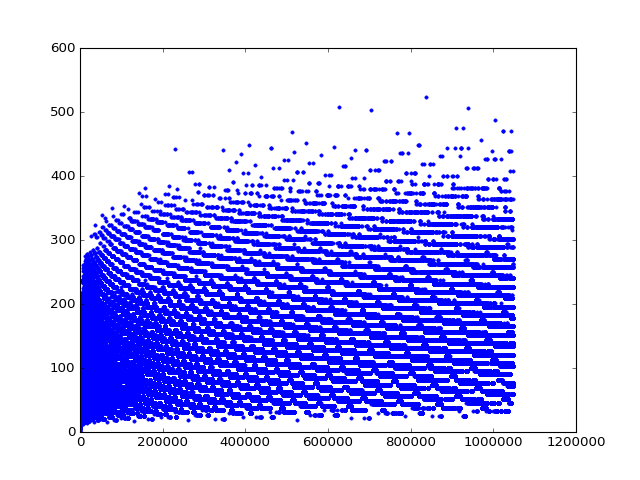

In [4]:
from pylab import *
%matplotlib notebook
plot(L,'.') #setzt nur Punkte, ohne diese zu verbinden
show() #zeigt Diagramm an